In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [24]:
## There are 3 different sheets in the EXCEL File. 
## I imported all of them

path = "collaboration network.xlsx"

people_list = pd.read_excel(path, sheet_name='People list')
paper_list = pd.read_excel(path, sheet_name='Paper list')
co_author_matrix = pd.read_excel(path, sheet_name='Co-author matrix')

col_auth = co_author_matrix.columns[1:]

co_auth_mat = co_author_matrix.to_numpy()
co_auth_mat = np.delete(co_auth_mat, 0, axis=1)
co_auth_mat = np.triu(co_auth_mat) + np.tril(co_auth_mat.T, -1)
co_auth_mat = co_auth_mat.astype(int)
pd_co_auth_mat = pd.DataFrame(co_auth_mat, columns =col_auth)

pd_co_auth_mat.reset_index(inplace=True, drop=True)

pd_co_auth_mat.index = np.transpose(col_auth)
display(pd_co_auth_mat.head(30))


,a001,a002,a003,a004,a005,a006,a007,a008,a009,a010,a011,a012,a013,a017,a018,a019,a020,a021,a026,a027,a028,a029,a030,a031,a032,a033,a034,a035,a036,a037,a038,a039,a040,a041,a042,a043,a044,a045,a046,a047,a048,a049,a050,a051,a052,a053,a054,a055,a056,a057,a058,a059,a060,a061,a062,a063,a064,a065,a066,a067,a068,a069,a070,a071,a072,a073,a074,a075,a076,a077,a078,a079,a080,a084,a085,a086,a087,a088,a089,a090,a091,a092,a093,a094,a095,a096,a097,a098,a099,a100,a101,a102,a103,a104,a105,a106,a107,a108,a109,a110,a111,a112,a113,a114,a115,a116
a001,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a002,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a003,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a004,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a005,0,0,0,0,0,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a006,0,0,0,0,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0
a007,0,0,0,0,1,1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a008,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a009,0,0,0,0,0,0,0,0,0,2,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
a010,0,0,0,0,0,0,0,0,2,0,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
## Retrieves unique values from the countries list
## to eliminate repitition
countries_list = set(people_list[people_list.columns[5]])
countries_list = np.array(list(countries_list))
for country in range(len(countries_list)):
    countries_list[country] = countries_list[country].split(', ')[1]
countries_list = np.unique(countries_list)
    
## Create a matrix where columns and rows are identical for
## the adjacency matrix of countries
countries_mat = np.zeros((len(countries_list),len(countries_list)))
countries_mat.shape

(19, 19)

In [4]:
authors_index = co_author_matrix.columns
authors_index = np.delete(authors_index, 0)
co_auth_mat = co_author_matrix.to_numpy()
co_auth_mat = np.delete(co_auth_mat, 0, axis=1)

## shows the index where the adjacency appears
indices = np.argwhere(co_auth_mat >= 1)
auth_arr = []
for ind in indices:
    auth_arr.append([authors_index[ind[0]], authors_index[ind[1]]])

## shows the value
values = []
for ind in indices:
    values.append(co_auth_mat[ind[0]][ind[1]])

In [5]:
author_country = people_list[[people_list.columns[0], people_list.columns[5]]]
author_country

,ID,"Location of Institutional affiliation in Column E [City (State), Country]"
0,a001,"Amherst, USA"
1,a002,"Chestnut Hill (MA), USA"
2,a003,"Chestnut Hill (MA), USA"
3,a004,"Frankfurt, Germany"
4,a005,"Milan, Italy"
...,...,...
101,a112,"Shanghai, China"
102,a113,"Bergamo, Italy"
103,a114,"Reggio Emilia, Italy"
104,a115,"Rome, Italy"


In [6]:
## Retrieves unique values from the countries list
## to eliminate repitition
countries_list = set(people_list[people_list.columns[5]])
countries_list = np.array(list(countries_list))
for country in range(len(countries_list)):
    countries_list[country] = countries_list[country].split(', ')[1]
countries_list = np.unique(countries_list)
    
## Create a matrix where columns and rows are identical for
## the adjacency matrix of countries
countries_mat = np.zeros((len(countries_list),len(countries_list)))

ind_1 = 0
ind_2 = 0
counter = 0

for auth in auth_arr:
    ind_1 = author_country.loc[author_country['ID'] == auth[0], author_country.columns[1]].iloc[0]
    ind_1 = ind_1.split(', ')[1]
    ind_2 = author_country.loc[author_country['ID'] == auth[1], author_country.columns[1]].iloc[0]
    ind_2 = ind_2.split(', ')[1]
    row = np.where(countries_list == ind_1)[0]
    col = np.where(countries_list == ind_2)[0]
    if row == col:
        countries_mat[row, col] += values[counter]/2
    else:
        countries_mat[row, col] += values[counter]/2
        countries_mat[col, row] += values[counter]/2
    counter += 1

countries_mat = countries_mat.astype(int)
countries_mat = pd.DataFrame(countries_mat, columns = countries_list)

# Reset index without assigning to column
countries_mat.reset_index(inplace=True, drop=True)

countries_mat.index = np.transpose(countries_list)
countries_mat

,Australia,Brazil,China,Germany,Hong Kong,Hungary,Illinois,Iran,Ireland,Israel,Italy,Netherlands,Russia,South Africa,South Korea,Switzerland,Turkiye,UK,USA
Australia,26,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brazil,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
China,0,0,4,1,1,0,0,0,0,0,0,0,0,0,0,3,0,0,3
Germany,0,0,1,15,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8
Hong Kong,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Hungary,0,0,0,0,0,1,0,0,2,0,0,0,0,0,0,0,0,0,0
Illinois,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Iran,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0
Ireland,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
Israel,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
adj_mat = countries_mat.to_numpy()

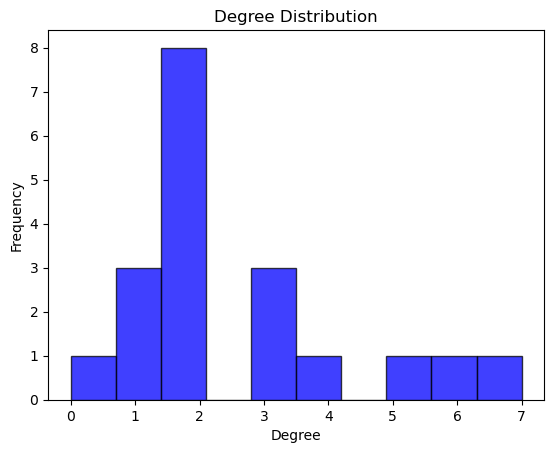

In [8]:
G = nx.from_numpy_array(adj_mat)
degree_sequence = [d for n, d in G.degree()]

# Plot the degree distribution
plt.hist(degree_sequence, bins='auto', alpha=0.75, color='b', edgecolor='black')
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

In [9]:
centrality_measures = {
    'Degree Centrality': nx.degree_centrality(G),
    'Closeness Centrality': nx.closeness_centrality(G),
    'Betweenness Centrality': nx.betweenness_centrality(G),
    'Eigenvector Centrality': nx.eigenvector_centrality(G),
    'PageRank': nx.pagerank(G),
    'Katz Centrality': nx.katz_centrality(G),
    'Harmonic Centrality': nx.harmonic_centrality(G),
    'Load Centrality': nx.load_centrality(G),
}

# Create a DataFrame to store centrality measures for each node
df_centrality = pd.DataFrame(centrality_measures)

# Calculate the top 2% nodes for each centrality measure
top_nodes = {}
for centrality_name, centrality_values in centrality_measures.items():
    threshold = df_centrality[centrality_name].quantile(0.98)
    top_nodes[centrality_name] = df_centrality[df_centrality[centrality_name] >= threshold].index.tolist()

# Display the nodes in the top 2% for each centrality measure
for centrality_name, top_nodes_list in top_nodes.items():
    print(f"Nodes in top 2% for {centrality_name}: {top_nodes_list}")

Nodes in top 2% for Degree Centrality: [18]
Nodes in top 2% for Closeness Centrality: [18]
Nodes in top 2% for Betweenness Centrality: [18]
Nodes in top 2% for Eigenvector Centrality: [18]
Nodes in top 2% for PageRank: [18]
Nodes in top 2% for Katz Centrality: [18]
Nodes in top 2% for Harmonic Centrality: [18]
Nodes in top 2% for Load Centrality: [18]


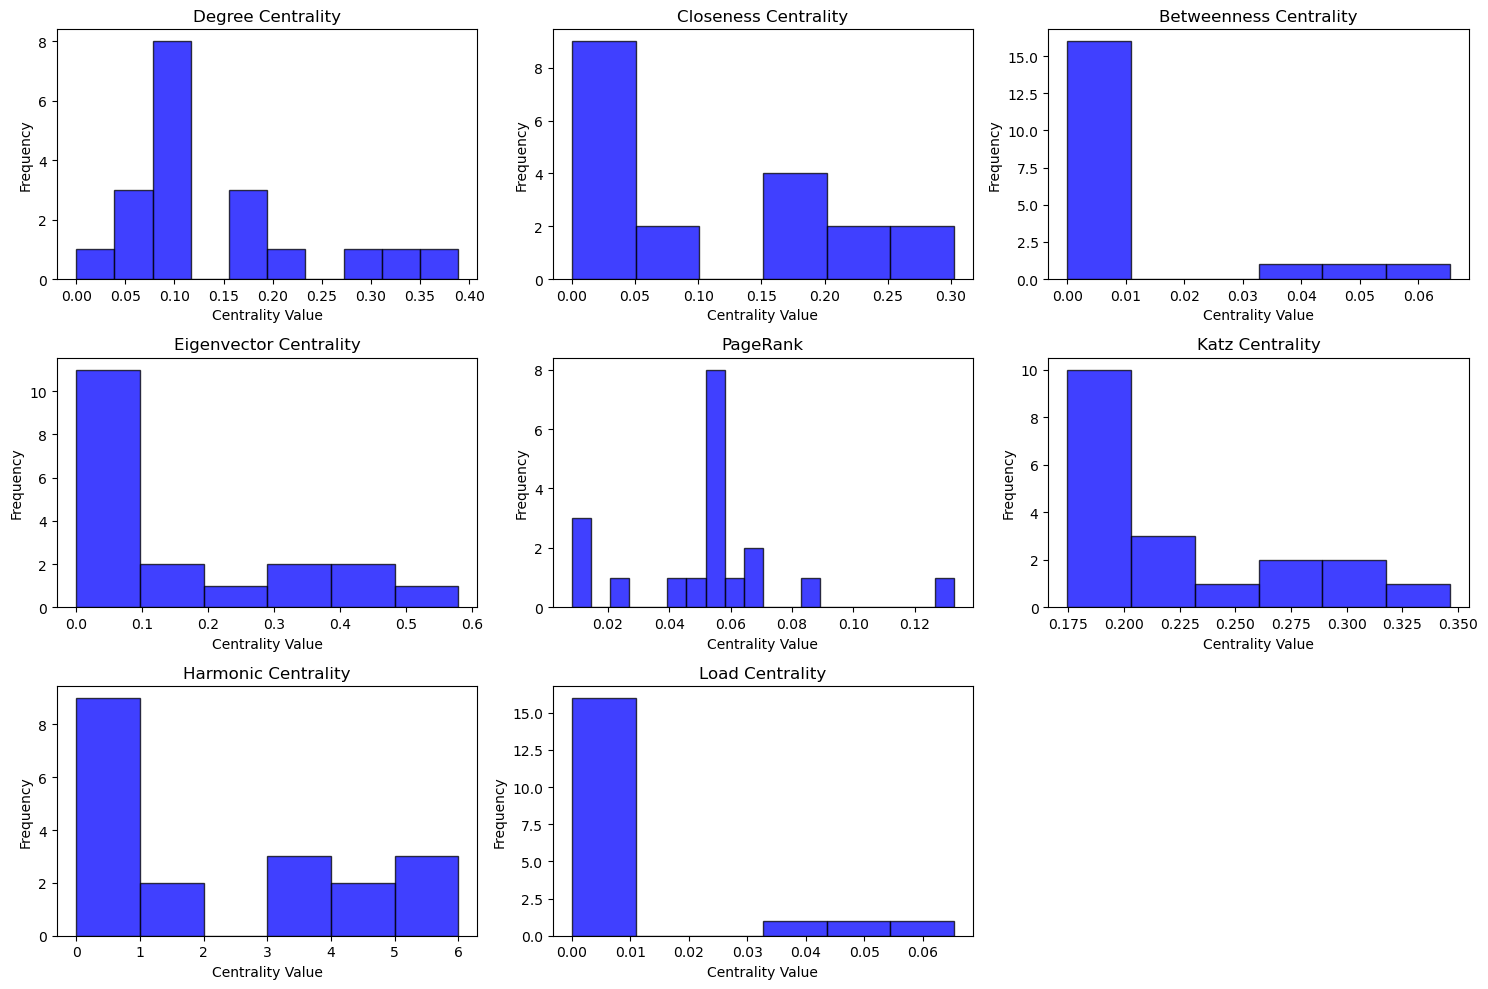

In [10]:
# Plot histograms for each centrality measure
plt.figure(figsize=(15, 10))
for i, centrality_name in enumerate(df_centrality.columns, start=1):
    plt.subplot(3, 3, i)
    plt.hist(df_centrality[centrality_name], bins='auto', alpha=0.75, color='b', edgecolor='black')
    plt.title(centrality_name)
    plt.xlabel("Centrality Value")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()